## (A) Load the data

In [101]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('ford.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  object 
 1   year          17964 non-null  int64  
 2   price         17964 non-null  int64  
 3   transmission  17964 non-null  object 
 4   mileage       17964 non-null  int64  
 5   fuelType      17964 non-null  object 
 6   mpg           17964 non-null  float64
 7   engineSize    17964 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


In [76]:
df['model'].value_counts()

 Fiesta                   6556
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Name: model, dtype: int64

In [77]:
df['transmission'].value_counts()

Manual       15517
Automatic     1360
Semi-Auto     1087
Name: transmission, dtype: int64

In [78]:
df['fuelType'].value_counts()

Petrol      12177
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64

## (B) Label Encoding 

In [79]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder()
le = LabelEncoder()

# le.fit(df['model'])

In [80]:
# list(le.classes_)

df['model']= le.fit_transform(df['model'])

In [81]:
df['transmission']= le.fit_transform(df['transmission'])

In [82]:
df['fuelType']= le.fit_transform(df['fuelType'])

In [83]:
df.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,5,2017,12000,0,15944,4,57.7,1.0
1,6,2018,14000,1,9083,4,57.7,1.0
2,6,2017,13000,1,12456,4,57.7,1.0
3,5,2019,17500,1,10460,4,40.3,1.5
4,5,2019,16500,0,1482,4,48.7,1.0


## One-hot Encoding 
- transmission 
- fuelType

In [84]:
df['transmission'].value_counts()

1    15517
0     1360
2     1087
Name: transmission, dtype: int64

In [85]:
df['fuelType'].unique()

array([4, 0, 2, 1, 3])

In [86]:
# df_transmission = pd.get_dummies(df["transmission"])
# df_transmission = df_transmission.drop("Manual", axis=1)
# display(df_transmission.sample(10))

In [87]:
# df_fuelType = pd.get_dummies(df["fuelType"])
# df_fuelType = df_fuelType.drop("Other", axis=1)
# display(df_fuelType.sample(10))

In [88]:
# df_model = pd.get_dummies(df["model"])
# df_model = df_model.drop("Escort", axis=1)
# display(df_model.sample(10))

### Features and target variable

In [89]:
df.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,5,2017,12000,0,15944,4,57.7,1.0
1,6,2018,14000,1,9083,4,57.7,1.0
2,6,2017,13000,1,12456,4,57.7,1.0
3,5,2019,17500,1,10460,4,40.3,1.5
4,5,2019,16500,0,1482,4,48.7,1.0


In [90]:
features = ['model', 'year', 'transmission','mileage','fuelType', 'mpg', 'engineSize']
target = ['price']

X = df[features]
y = df[target]

print("Shape of X = ", X.shape)
print("Shape of y = ", y.shape)

Shape of X =  (17964, 7)
Shape of y =  (17964, 1)


## (C) Split the data set into test and train data set

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14371, 7) (3593, 7) (14371, 1) (3593, 1)


## (D) Linear Regression and Prediction

In [93]:
model = LinearRegression()
model = model.fit(X_train, y_train)

In [95]:
Y_pred = model.predict(X_test)
print(Y_pred)

[[12573.04936473]
 [15484.85237239]
 [12339.27337362]
 ...
 [15953.02789821]
 [14902.38842846]
 [ 7044.5874836 ]]


## (E) coefficients

In [96]:
print( 'intercept = ', model.intercept_, '\ncoefficients = ', model.coef_)

intercept =  [-2522085.51371377] 
coefficients =  [[ 2.68085347e+01  1.25850530e+03 -2.81701097e+02 -5.56127825e-02
  -3.61820405e+02 -1.18083333e+02  3.95016919e+03]]


## (F) Find the MAE, MAPE, MSE, RMSE, coefficient of determination values

In [100]:
RMSE = mean_squared_error(y_test,y_pred, squared = False)
MAE = mean_absolute_error(y_test, y_pred)
MAPE = mean_absolute_percentage_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred, squared = True)
R_squared = r2_score(y_test, y_pred)

print('RMSE = ', RMSE, '\nMAE = ',MAE, '\nMAPE =', MAPE, '\nMSE =', MSE, '\nR_squared = ', R_squared)

RMSE =  2496.886540323712 
MAE =  1770.7864197834099 
MAPE = 0.174456761653786 
MSE = 6234442.395249715 
R_squared =  0.7427911488799012


## (G) Compare the actual and predicted target variable through visualization

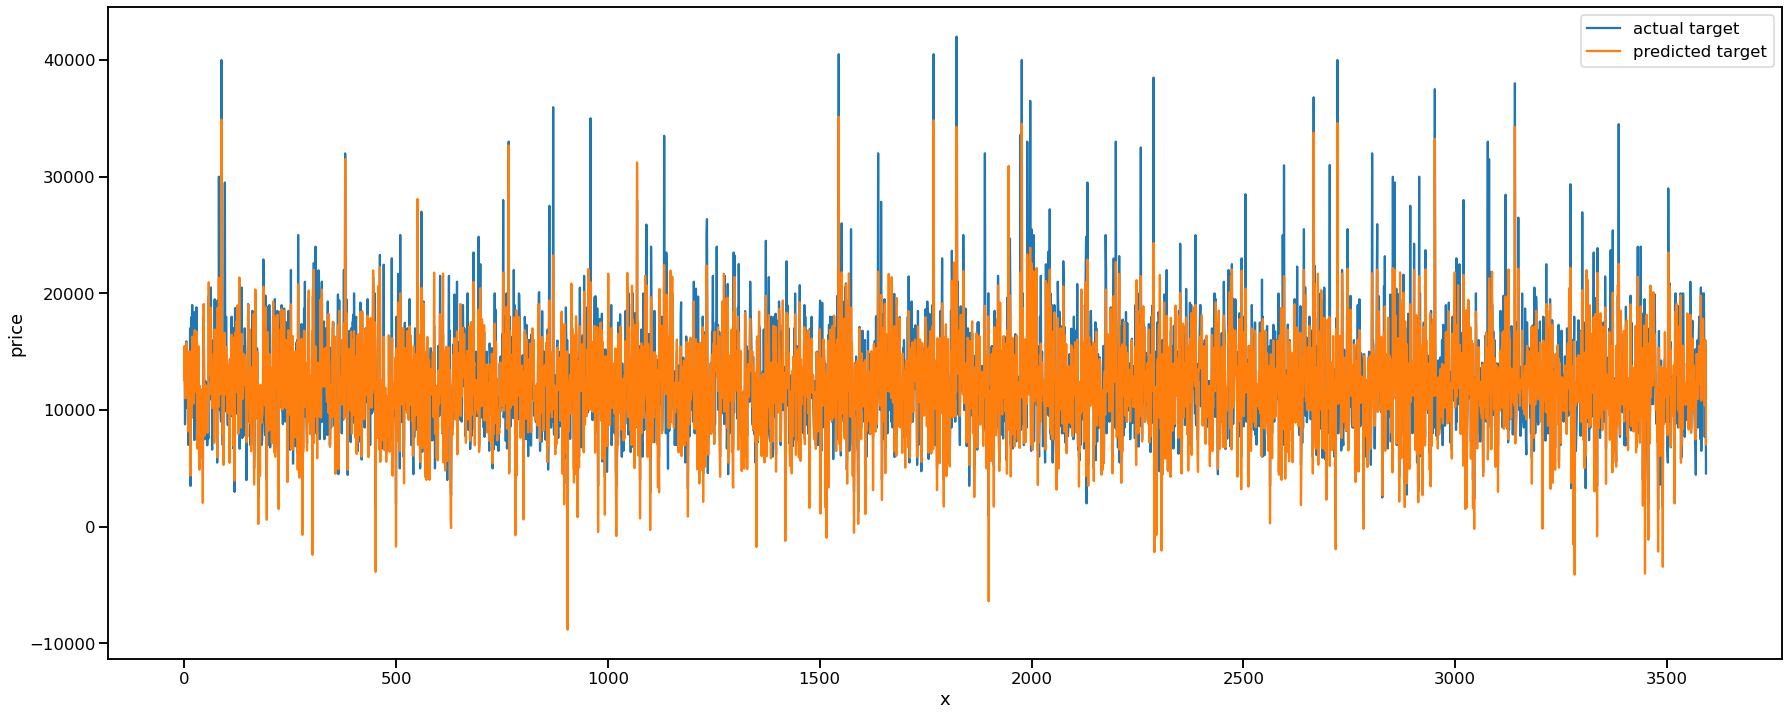

In [102]:
y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(30,12))

sns.lineplot(x='x', y='price', data=y_test, label='actual target')
sns.lineplot(x='x', y='pred', data=y_test, label='predicted target')
plt.show()


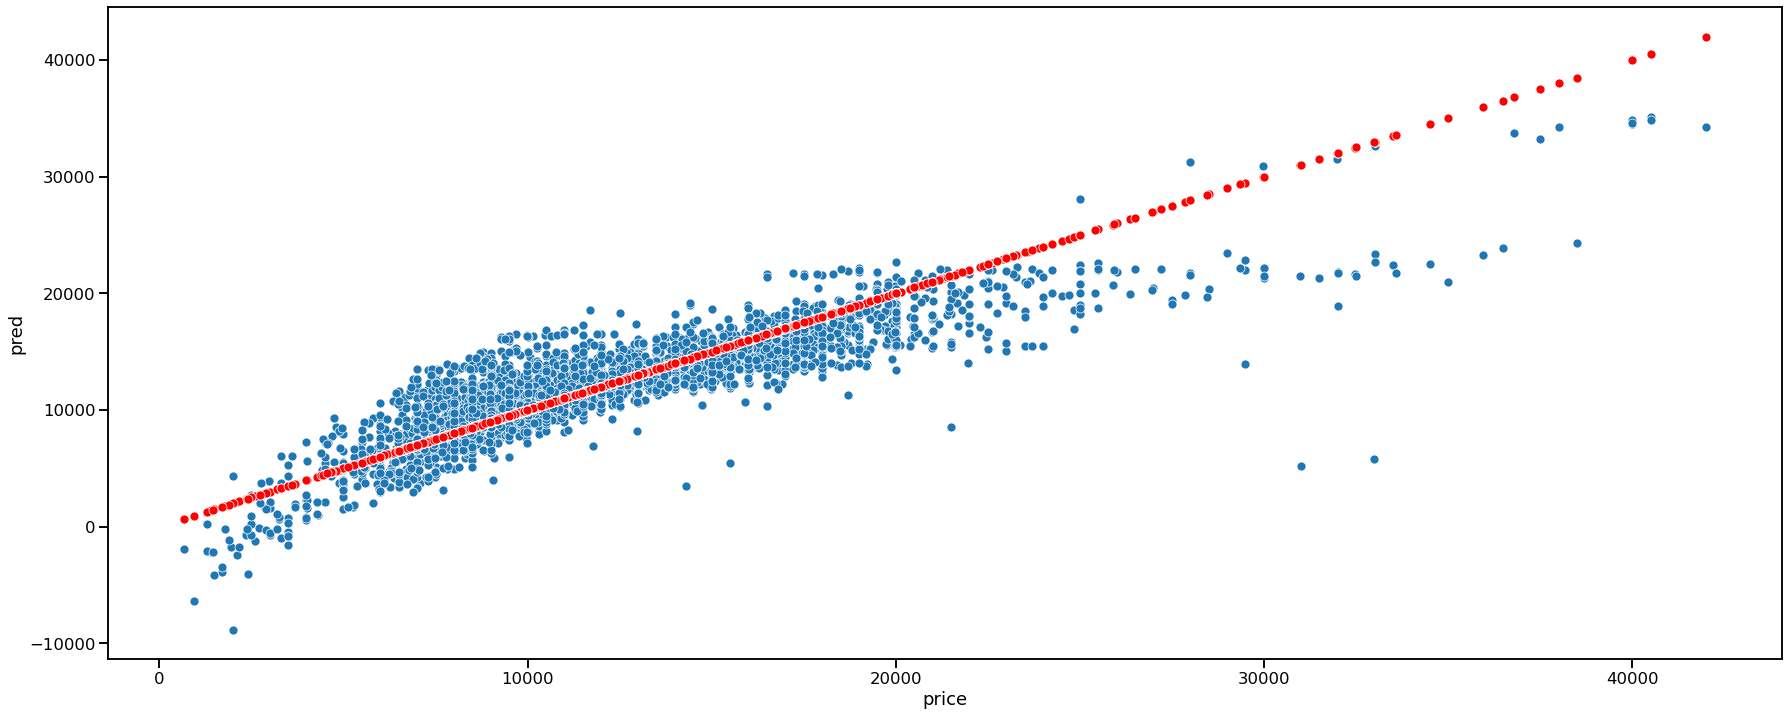

In [103]:
plt.figure(figsize=(30,12))

sns.scatterplot(x='price', y='pred', data=y_test)

sns.scatterplot(x='price', y='price', data=y_test, color='red')
plt.show()